# **$$Stroke~ Prediction$$**
***

## *__Problem Statement:__*

__A Predictive Analysis approach to predict `Stroke` using various `Machine Learning Algorithm` and Using `Artificial Neural Networks`.__

***
## *$$Importing~ Libraries$$*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

***
## *$$Importing~ Dataset$$*

In [2]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

## *$$About~ Dataset$$*

_**According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths. This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.**_

- **id**                 - Unique Identifier.
- **gender**             - Gender of the Patient. (*Male, Female or Other*)
- **age**                - Age of the Patient in Years.
- **hypertension**       - Hypertension is when blood pressure is too high.(boolean)
                        1 = If the patient have hypertension.
                        0 = If the patient doesn't have hypertension.
- **heart_disease**      - Patient has some heart related problem.(boolean)
                        1 = If the patient have any heart diseases.
                        0 = If the patient doesn't have any heart diseases.
- **ever_married**       - Patient has ever married or not.("Yes" or "No")
- **work_type**          - What kind of work does the patient do.
                        * Private.
                        * Govt_job.
                        * Self-employed.
                        * Never_worked.
                        * children.
- **Residence_type**     - What type of residential surroundings the patient lives in.
                        * Rural.
                        * Urban.
- **avg_glucose_level**  - Level of glucose in the blood of the patient.(mg/dL)
- **bmi**                - Body Mass Index.
- **smoking_status**     - What is the patient smoking habit.
                        * formerly smoked.
                        * never smoked.
                        * smokes.
                        * Unknown.
- **Stroke**             - If the patient had a stroke or not.(boolean)
                        1 = Patient had stroke.
                        0 = Patient didn't had stroke.

In [3]:
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


***
## *$$Data~Cleaning$$*

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
ag = []
for i in df.age:
    if i <= 5.0:
        ag.append("Child")
    elif i > 5.0 and i < 18.0:
        ag.append("Teen")
    elif i >= 18.0 and i < 60.0:
        ag.append("Adult")
    else:
        ag.append("Senior Citizen")
df['Age_Group'] = ag
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Age_Group
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Senior Citizen
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,Senior Citizen
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Senior Citizen
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,Adult
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,Senior Citizen


In [7]:
ag_g = df.groupby('Age_Group')
a = ag_g.bmi.mean()
a

Age_Group
Adult             30.646341
Child             18.659164
Senior Citizen    29.969339
Teen              23.012000
Name: bmi, dtype: float64

In [8]:
b = ()
for i in a:
    b = b+(i,)
Adult_m,Child_m,Senior_Citizen_m,Teen_m = b
print(Adult_m,Child_m,Senior_Citizen_m,Teen_m)

30.646341463414632 18.659163987138264 29.969338521400775 23.011999999999997


In [9]:
def impute_bmi(cols):
    bmi = cols[0]
    Age_Group = cols[1]
    if pd.isnull(bmi):
        if Age_Group == 'Senior Citizen':
                return Senior_Citizen_m
        elif Age_Group == 'Adult':
            return Adult_m
        elif Age_Group == 'Teen':
            return Teen_m
        elif Age_Group == 'Child':
            return Child_m
    else:
        return bmi
df['bmi']=df[['bmi','Age_Group']].apply(impute_bmi,axis=1)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Age_Group
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,Senior Citizen
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,29.969339,never smoked,1,Senior Citizen
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,Senior Citizen
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,Adult
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,Senior Citizen


In [10]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
Age_Group            0
dtype: int64

In [11]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.912592,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.719640,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.700000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.300000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [12]:
df['age'] = df['age'].apply(np.ceil)

In [13]:
df.head(165) # row 162 was such an example

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Age_Group
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,Senior Citizen
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,29.969339,never smoked,1,Senior Citizen
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,Senior Citizen
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,Adult
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,Senior Citizen
...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,50931,Female,76.0,0,0,Yes,Private,Urban,57.92,29.969339,formerly smoked,1,Senior Citizen
161,16590,Male,71.0,0,1,Yes,Private,Urban,81.76,29.969339,smokes,1,Senior Citizen
162,69768,Female,2.0,0,0,No,children,Urban,70.37,18.659164,Unknown,1,Child
163,20426,Female,78.0,1,0,No,Private,Urban,203.87,45.700000,never smoked,1,Senior Citizen


In [14]:
df[df.gender == 'Other']

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Age_Group
3116,56156,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0,Adult


In [15]:
df.drop(df[df.gender == 'Other'].index,inplace=True)

df.gender.value_counts()

Female    2994
Male      2115
Name: gender, dtype: int64

***
## *$$Treating~ Outliers$$*

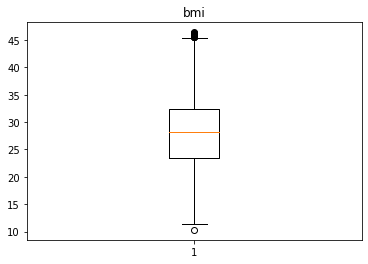

In [16]:
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['bmi']<(Q1-1.5*IQR))|(df['bmi']>(Q3+1.5*IQR)))]
plt.title('bmi')
plt.boxplot(df['bmi'])
plt.show()

***
# **$$Feature~Engineering$$**

In [17]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Age_Group
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,Senior Citizen
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,29.969339,never smoked,1,Senior Citizen
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,Senior Citizen
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,Adult
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,Senior Citizen


In [18]:
df=df.drop(['id','Age_Group'],axis=1)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,29.969339,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [19]:
continuous = ['age','avg_glucose_level', 'bmi']
categorical = ['gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status','Age_Group','stroke']

In [20]:
categorical_drop = []
for i in categorical:
    if i != 'hypertension' and i != 'heart_disease' and i != 'Age_Group':
        categorical_drop.append(i)
categorical_drop

['gender',
 'ever_married',
 'work_type',
 'Residence_type',
 'smoking_status',
 'stroke']

In [21]:
categorical_drop.pop()
df_enc=pd.get_dummies(df[categorical_drop],drop_first=True)
df_enc.head()

,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,1,0,1,0,0,1,1,0,0
1,0,1,0,0,1,0,0,0,1,0
2,1,1,0,1,0,0,0,0,1,0
3,0,1,0,1,0,0,1,0,0,1
4,0,1,0,0,1,0,0,0,1,0


In [22]:
df[df_enc.columns]=df_enc
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,...,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,...,1,1,0,1,0,0,1,1,0,0
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,29.969339,never smoked,...,0,1,0,0,1,0,0,0,1,0
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,...,1,1,0,1,0,0,0,0,1,0
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,...,0,1,0,1,0,0,1,0,0,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,...,0,1,0,0,1,0,0,0,1,0


In [23]:
df.drop(categorical_drop,axis=1,inplace=True)
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.600000,1,1,1,0,1,0,0,1,1,0,0
1,61.0,0,0,202.21,29.969339,1,0,1,0,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.500000,1,1,1,0,1,0,0,0,0,1,0
3,49.0,0,0,171.23,34.400000,1,0,1,0,1,0,0,1,0,0,1
4,79.0,1,0,174.12,24.000000,1,0,1,0,0,1,0,0,0,1,0


***
### *$$Oversampling$$*

class 0: (4740, 16)
class 1: (246, 16)
total values of 1 and 0: 0    4740
1    4740
Name: stroke, dtype: int64


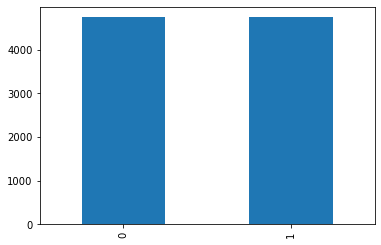

In [24]:
class_count_0, class_count_1 = df.stroke.value_counts()
# Separate class
class_0 = df[df.stroke == 0]
class_1 = df[df.stroke == 1]

print('class 0:', class_0.shape)
print('class 1:', class_1.shape)
    
class_1_over = class_1.sample(class_count_0, replace=True)
df = pd.concat([class_0,class_1_over], axis=0)

print("total values of 1 and 0:",df.stroke.value_counts())

df.stroke.value_counts().plot(kind='bar')
plt.show()

***
# *$$Machine~Learning~Model$$*

In [25]:
from sklearn.model_selection import train_test_split

## *$$Separating~Target~Variables~from~other~features$$*

In [26]:
X = df.drop(columns = ["stroke"])
y = df["stroke"]

## *$$Separating~Target~Variables~from~other~features:$$*

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((6636, 15), (6636,), (2844, 15), (2844,))

## *$$Feature Scaling$$*

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

***
# *$$ANN$$*

In [30]:
#importing keras libraries and pakages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU, PReLU, ELU
#from keras.layers import Dropout

In [31]:
# kernel_initializer ---> For initialising weights 

# batch_size----> Number of samples that will be passed through the network at one time.

# Higher the batch size, more memory space is needed.

# epochs----> Training the neural network with all the training data for one cycle.

#Initialising the ANN
classifier = Sequential()

#Adding the input layer and first hidden layer
classifier.add(Dense(units=64, kernel_initializer ='he_uniform', activation='relu', input_dim = 15))

#Adding the second Hidden layer
classifier.add(Dense(units=32, kernel_initializer ='he_uniform', activation='relu'))

#Adding the output layer
classifier.add(Dense(units=1, kernel_initializer ='glorot_uniform', activation='sigmoid'))

#Compiling the ANN
classifier.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

#Fitting the ANN to training set
model_history = classifier.fit(X_train, y_train, validation_split = 0.33, batch_size = 50, epochs = 100)

Epoch 1/100
89/89 [==============================] - 4s 8ms/step - loss: 0.5653 - accuracy: 0.6961 - val_loss: 0.4990 - val_accuracy: 0.7598
Epoch 2/100
89/89 [==============================] - 0s 3ms/step - loss: 0.4807 - accuracy: 0.7776 - val_loss: 0.4641 - val_accuracy: 0.7858
Epoch 3/100
89/89 [==============================] - 0s 3ms/step - loss: 0.4469 - accuracy: 0.8059 - val_loss: 0.4418 - val_accuracy: 0.8068
Epoch 4/100
89/89 [==============================] - 0s 3ms/step - loss: 0.4268 - accuracy: 0.8095 - val_loss: 0.4291 - val_accuracy: 0.8059
Epoch 5/100
89/89 [==============================] - 0s 3ms/step - loss: 0.4118 - accuracy: 0.8153 - val_loss: 0.4190 - val_accuracy: 0.8073
Epoch 6/100
89/89 [==============================] - 0s 3ms/step - loss: 0.3986 - accuracy: 0.8237 - val_loss: 0.4080 - val_accuracy: 0.8205
Epoch 7/100
89/89 [==============================] - 0s 3ms/step - loss: 0.3865 - accuracy: 0.8291 - val_loss: 0.3996 - val_accuracy: 0.8192
Epoch 8/100
8

Epoch 59/100
89/89 [==============================] - 0s 3ms/step - loss: 0.1290 - accuracy: 0.9606 - val_loss: 0.2335 - val_accuracy: 0.9178
Epoch 60/100
89/89 [==============================] - 0s 3ms/step - loss: 0.1277 - accuracy: 0.9627 - val_loss: 0.2273 - val_accuracy: 0.9338
Epoch 61/100
89/89 [==============================] - 0s 5ms/step - loss: 0.1251 - accuracy: 0.9622 - val_loss: 0.2182 - val_accuracy: 0.9301
Epoch 62/100
89/89 [==============================] - 0s 4ms/step - loss: 0.1249 - accuracy: 0.9627 - val_loss: 0.2277 - val_accuracy: 0.9224
Epoch 63/100
89/89 [==============================] - 0s 4ms/step - loss: 0.1226 - accuracy: 0.9640 - val_loss: 0.2309 - val_accuracy: 0.9201
Epoch 64/100
89/89 [==============================] - 0s 3ms/step - loss: 0.1211 - accuracy: 0.9629 - val_loss: 0.2239 - val_accuracy: 0.9315
Epoch 65/100
89/89 [==============================] - 0s 3ms/step - loss: 0.1194 - accuracy: 0.9647 - val_loss: 0.2287 - val_accuracy: 0.9256
Epoch 

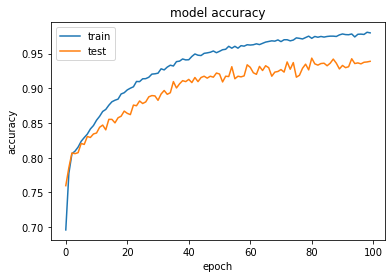

In [32]:
#summarize the history of accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

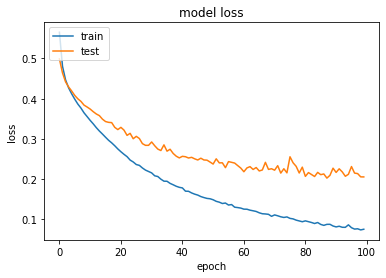

In [33]:
#summarize the history of loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

In [34]:
#predicting the test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred>0.5)

In [35]:
#Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred, y_test)
cm

array([[1269,   11],
       [ 157, 1407]], dtype=int64)

In [36]:
#calculate the accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
score

0.9409282700421941

In [42]:
from sklearn.metrics import classification_report

In [43]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.89      0.94      1426
           1       0.90      0.99      0.94      1418

    accuracy                           0.94      2844
   macro avg       0.95      0.94      0.94      2844
weighted avg       0.95      0.94      0.94      2844

